## Chapter05 이산형 확률변수

## 5.2      2차원 이산형 확률변수

#### 결합확률분포
- 2차원 확률변수에서는 1차원 확률분포 2개를 동시에 다룹니다.(X,Y). 
- 또한 확률변수의 움직임은 취할 수 있는 값의 조합으로 이루어진 집합과 그 확률에 의해 정해집니다. 

- $ P(X=x, Y=y) = p_{i,j}$
- 이와 같이 확률변수(X,Y)의 움직임을 동시에 고려한 분포를 결합확률분포(joint probability distribution) 또는 "결합분포"라고 합니다. 

#### 결합확률함수(joint probability function): $f_{X,Y}(x,y)$
- $P(X=x,Y=y)= f_{X,Y}(x,y)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [2]:
def f_XY(x, y):
    if 1 <= y <=6 and 1 <= x - y <= 6:
        return y * (x-y) / 441
    else:
        return 0

In [3]:
XY = [x_set, y_set, f_XY]

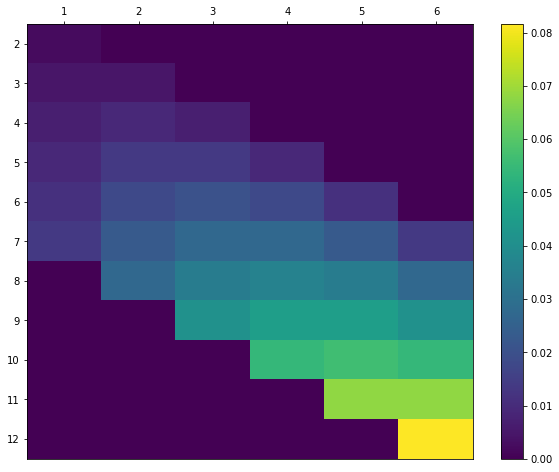

In [4]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                 for x_i in x_set])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)
# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다
ax.invert_yaxis()
# x축의 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [5]:
np.all(prob >= 0)

True

In [6]:
np.sum(prob)

1.0

#### 주변환률분포
- 결합확률함수f_xy에서 확률변수Y의 영향을 제거하면 확률변수X의 움직임을 나타내는 확률변수X의 확률함수만 남는다고 생각하면 상상하기 쉽습니다.
- fx(X)를 X의 주변확률분포(marginal probability distribution)라 하고, 간단히 X의 "주변분포"라고도 표현합니다.

In [7]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [8]:
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [9]:
X = [x_set, f_X]
Y = [y_set, f_Y]

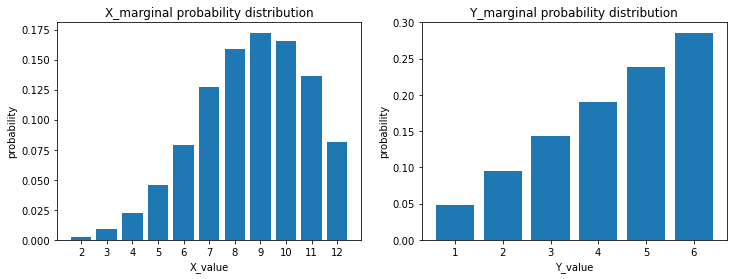

In [10]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

### 2차원 이산형 확률분포의 지표

### 기댓값

In [11]:
# X에 대한 기대값(모든y에 대해서는 계산함)
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.666666666666666

In [12]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [13]:
mean_X = E(XY, lambda x, y: x)
mean_X

8.666666666666666

In [14]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

4.333333333333333

#### 기대값의 선형성
- E(aX+bY) = aE(X)+bE(Y)

In [15]:
a, b = 2, 3

In [16]:
E(XY, lambda x, y: a*x + b*y)

30.333333333333332

In [17]:
a * mean_X + b * mean_Y

30.333333333333332

#### 분산
- $V(X)=\sigma_{x}^2=\sum_{i}\sum_{j} (x_i-\mu_x)^2f_{x,y}(x_i,y_j)   $

In [18]:
np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j)
       for x_i in x_set for y_j in y_set])

4.444444444444444

In [19]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [20]:
var_X = V(XY, g=lambda x, y: x)
var_X

4.444444444444444

In [21]:
var_Y = V(XY, g=lambda x, y: y)
var_Y

2.2222222222222223

#### 공분산
- $Cov(X,Y)=\sigma_{x,y}=\sum_{i}\sum_{j} (x_i-\mu_x)(y_i-\mu_y)f_{x,y}(x_i,y_j)   $

In [22]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

In [23]:
cov_xy = Cov(XY)
cov_xy

2.222222222222222

#### 분산과 공분산의 공식
- $V(aX+bY) = a^2V(X)+b^2V(Y)+2abCov(X,Y)$

In [24]:
V(XY, lambda x, y: a*x + b*y)

64.44444444444444

In [25]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.44444444444443

#### 상관계수
- $\rho_{x,y}=\rho(X,Y)=\sigma_{x,y}/\sigma_x\sigma_y$

In [26]:
cov_xy / np.sqrt(var_X * var_Y)

0.7071067811865474